# Airline Satisfaction - Classification

The following dataframe was imported from kaggle.com. It presents reviews of a certain airline made by close to 130 thousand people. Each person is identified by his/her ID number follwed by some identifying features of the person and the type of flight and the review of said person in several different categories (explained further down in the notebook). The review system is to give a 0-5 star rating for each category. This is followed by a concluding column of whether the person was overall "satisfied" with the airline and the flight or was "neutral or dissatisfied".<br><br>

Our purpose in this notebook is to determine whether a given passenger not from the dataframe given, provided all the data of the passenger's review except the last column where he/she stated the overall satisfaction, was satisfied with the airline or not (in other words: which of the 2 possible answers the passenger would choose: "satisfied" or "neutral or dissatisfied").

In [2]:
#Importing the libraries used
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [3]:
defaultTest = pd.read_csv('Datasets/Classification/Import/test.csv') #importing the dataframe 'test.csv' from the appropriate folder
defaultTrain = pd.read_csv('Datasets/Classification/Import/train.csv') #importing the dataframe 'train.csv' from the appropriate folder
fulldf = pd.concat([defaultTest, defaultTrain]) #merging  the 2 datasets, so that we can work as if we were given the undivided
#dataset in the first place.
fulldf.index.name = 'i' #renaming the index column so that the new index will not have the same name as the old
fulldf = fulldf.reset_index() #Resetting the indexes for appearance's sake.
fulldf = fulldf.drop(['i', 'Unnamed: 0'], axis = 1) #removing the columns of indexes which we changed: the change was not
#necessary, only for the sake of appearance
fulldf

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,3,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,3,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,2,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,4,...,2,2,2,2,4,2,4,0,20.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,94171,Female,disloyal Customer,23,Business travel,Eco,192,2,1,2,...,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
129876,73097,Male,Loyal Customer,49,Business travel,Business,2347,4,4,4,...,5,5,5,5,5,5,4,0,0.0,satisfied
129877,68825,Male,disloyal Customer,30,Business travel,Business,1995,1,1,1,...,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
129878,54173,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,1,...,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied


In [4]:
dupl = fulldf.groupby(['id']).size()>1
dupl.value_counts()
#Checking that there are no duplicates (no values that are true)

False    129880
dtype: int64

In [5]:
fulldf = fulldf.drop(['id'], axis = 1) #Further unneded attribute

In [6]:
list(fulldf)

['Gender',
 'Customer Type',
 'Age',
 'Type of Travel',
 'Class',
 'Flight Distance',
 'Inflight wifi service',
 'Departure/Arrival time convenient',
 'Ease of Online booking',
 'Gate location',
 'Food and drink',
 'Online boarding',
 'Seat comfort',
 'Inflight entertainment',
 'On-board service',
 'Leg room service',
 'Baggage handling',
 'Checkin service',
 'Inflight service',
 'Cleanliness',
 'Departure Delay in Minutes',
 'Arrival Delay in Minutes',
 'satisfaction']

#### Let us classify this data and see what each column (listed above) is made of:
<b>id</b> - Categorical - although it contains numeral values, they are not used as numbers to add/subtract etc., only as an identifying number of said passenger

In [7]:
fulldf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             129880 non-null  object 
 1   Customer Type                      129880 non-null  object 
 2   Age                                129880 non-null  int64  
 3   Type of Travel                     129880 non-null  object 
 4   Class                              129880 non-null  object 
 5   Flight Distance                    129880 non-null  int64  
 6   Inflight wifi service              129880 non-null  int64  
 7   Departure/Arrival time convenient  129880 non-null  int64  
 8   Ease of Online booking             129880 non-null  int64  
 9   Gate location                      129880 non-null  int64  
 10  Food and drink                     129880 non-null  int64  
 11  Online boarding                    1298

In [8]:
fulldf['Gender'].value_counts()
#fulldf['Customer Type'].value_counts()
#fulldf['Type of Travel'].value_counts()
#fulldf['Class'].value_counts()
#fulldf['satisfaction'].value_counts()

Female    65899
Male      63981
Name: Gender, dtype: int64

In [9]:
#Changing values in the satisfied/dissatisfied column

fulldf['Gender'] = fulldf['Gender'].replace({"Male": 0, "Female": 1})
fulldf['satisfaction'] = fulldf['satisfaction'].replace({"neutral or dissatisfied": 0, "satisfied": 1})
fulldf['Type of Travel'] = fulldf['Type of Travel'].replace({"Personal Travel": 0, "Business travel": 1})
fulldf['Customer Type'] = fulldf['Customer Type'].replace({"disloyal Customer": 0, "Loyal Customer": 1})
fulldf['Class'] = fulldf['Class'].replace({"Eco": 0, "Eco Plus": 1, "Business": 2})
fulldf



,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,1,1,52,1,0,160,5,4,3,4,...,5,5,5,5,2,5,5,50,44.0,1
1,1,1,36,1,2,2863,1,1,3,1,...,4,4,4,4,3,4,5,0,0.0,1
2,0,0,20,1,0,192,2,0,2,4,...,2,4,1,3,2,2,2,0,0.0,0
3,0,1,44,1,2,3377,0,0,0,2,...,1,1,1,1,3,1,4,0,6.0,1
4,1,1,49,1,0,1182,2,3,4,3,...,2,2,2,2,4,2,4,0,20.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,1,0,23,1,0,192,2,1,2,3,...,2,3,1,4,2,3,2,3,0.0,0
129876,0,1,49,1,2,2347,4,4,4,4,...,5,5,5,5,5,5,4,0,0.0,1
129877,0,0,30,1,2,1995,1,1,1,3,...,4,3,2,4,5,5,4,7,14.0,0
129878,1,0,22,1,0,1000,1,1,1,5,...,1,4,5,1,5,4,1,0,0.0,0


In [10]:
fulldf.describe() #NaN values are ignored - to be repeated after NaN are treated

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
count,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,...,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129487.000000,129880.000000
mean,0.507384,0.816908,39.427957,0.690584,1.029650,1190.316392,2.728696,3.057599,2.756876,2.976925,...,3.358077,3.383023,3.350878,3.632114,3.306267,3.642193,3.286326,14.713713,15.091129,0.434463
std,0.499947,0.386743,15.119360,0.462255,0.962636,997.452477,1.329340,1.526741,1.401740,1.278520,...,1.334049,1.287099,1.316252,1.180025,1.266185,1.176669,1.313682,38.071126,38.465650,0.495688
min,0.000000,0.000000,7.000000,0.000000,0.000000,31.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,27.000000,0.000000,0.000000,414.000000,2.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,40.000000,1.000000,1.000000,844.000000,3.000000,3.000000,3.000000,3.000000,...,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,51.000000,1.000000,2.000000,1744.000000,4.000000,4.000000,4.000000,4.000000,...,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000,1.000000
max,1.000000,1.000000,85.000000,1.000000,2.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000211CFBAADC0>,
      dtype=object)

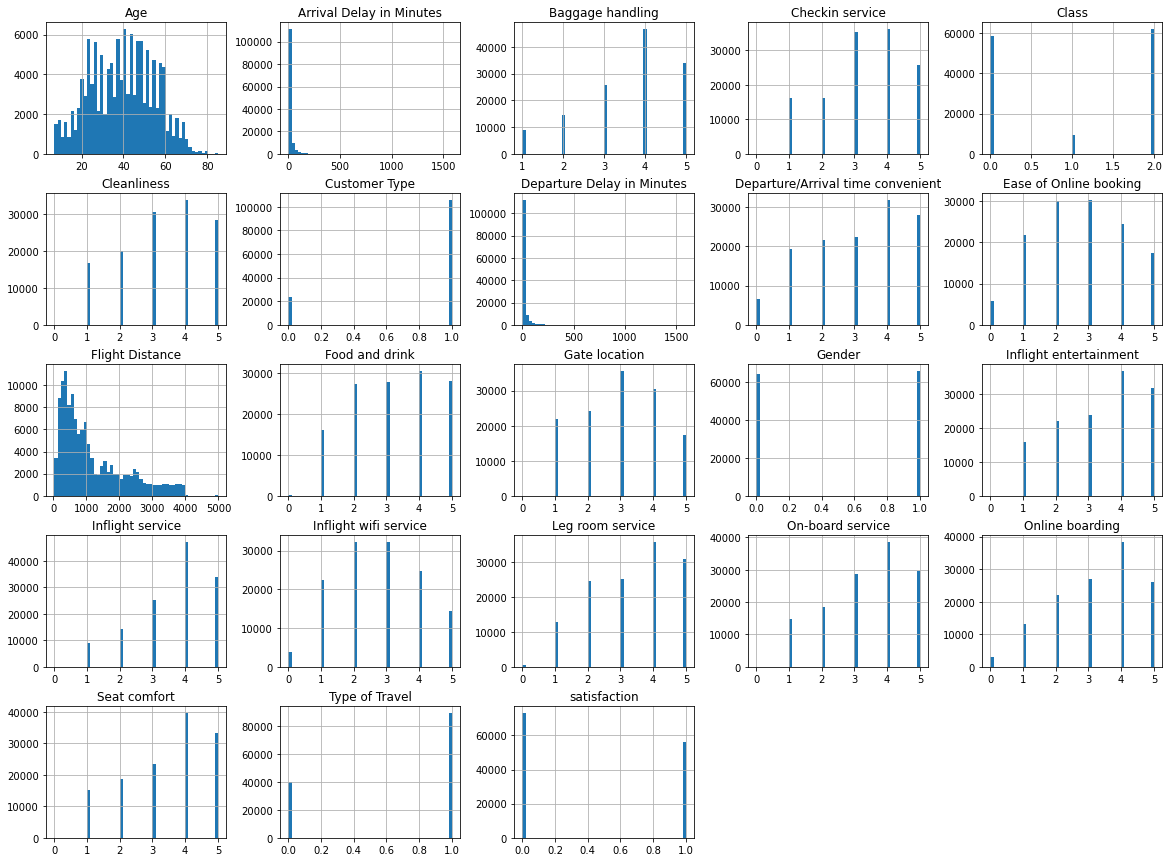

In [11]:
fulldf.hist(bins=50, figsize=(20,15))

In [12]:
fulldf.corr() # correlation graph

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
Gender,1.000000,-0.030958,-0.008996,0.009503,-0.005774,-0.003616,-0.005901,-0.008995,-0.005893,0.000863,...,-0.003843,-0.006447,-0.031047,-0.036356,-0.008462,-0.038504,-0.002867,-0.003491,-0.001309,-0.011236
Customer Type,-0.030958,1.000000,0.284172,-0.308236,0.105641,0.226021,0.005757,0.206873,0.018059,-0.004465,...,0.106001,0.054172,0.046841,-0.024874,0.031243,-0.023292,0.081302,-0.003859,-0.004730,0.186017
Age,-0.008996,0.284172,1.000000,0.044808,0.140504,0.099459,0.016116,0.036960,0.022565,-0.000398,...,0.074947,0.057078,0.039119,-0.047991,0.033475,-0.051347,0.052565,-0.009041,-0.011248,0.134091
Type of Travel,0.009503,-0.308236,0.044808,1.000000,0.545447,0.266792,0.105865,-0.257102,0.134078,0.029869,...,0.152936,0.059794,0.139612,0.033012,-0.016247,0.023538,0.084615,0.005913,0.005830,0.449861
Class,-0.005774,0.105641,0.140504,0.545447,1.000000,0.450814,0.036869,-0.089976,0.107537,0.005861,...,0.196246,0.211103,0.206129,0.161364,0.151299,0.155864,0.138491,-0.009877,-0.014104,0.492947
Flight Distance,-0.003616,0.226021,0.099459,0.266792,0.450814,1.000000,0.006701,-0.018914,0.065165,0.005520,...,0.130507,0.111194,0.134533,0.064855,0.073608,0.059316,0.095648,0.002402,-0.001935,0.298085
Inflight wifi service,-0.005901,0.005757,0.016116,0.105865,0.036869,0.006701,1.000000,0.344915,0.714807,0.338573,...,0.207802,0.119928,0.160317,0.120376,0.043762,0.110029,0.131300,-0.015946,-0.017749,0.283460
Departure/Arrival time convenient,-0.008995,0.206873,0.036960,-0.257102,-0.089976,-0.018914,0.344915,1.000000,0.437620,0.447510,...,-0.008380,0.067297,0.010617,0.070833,0.091132,0.072195,0.009862,0.000778,-0.000942,-0.054270
Ease of Online booking,-0.005893,0.018059,0.022565,0.134078,0.107537,0.065165,0.714807,0.437620,1.000000,0.460041,...,0.046564,0.039064,0.109450,0.039148,0.008819,0.035373,0.015125,-0.005318,-0.007033,0.168877
Gate location,0.000863,-0.004465,-0.000398,0.029869,0.005861,0.005520,0.338573,0.447510,0.460041,1.000000,...,0.002741,-0.029019,-0.005181,0.000972,-0.039353,0.000310,-0.005918,0.005973,0.005658,-0.002793


In [13]:
#from pandas.plotting import scatter_matrix
#scatter_matrix(fulldf, figsize=(12, 8))

## Dealing with NaN

In [14]:
fulldf[fulldf.isna().any(axis=1)]

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
516,1,1,21,0,0,632,1,5,1,4,...,2,4,2,5,4,5,2,9,NaN,0
656,0,1,9,0,0,762,2,5,2,2,...,4,2,5,2,5,2,4,51,NaN,0
1071,0,0,25,1,0,1017,3,4,4,5,...,5,2,5,2,3,2,5,126,NaN,0
1224,0,1,7,0,0,399,4,5,4,4,...,4,4,3,1,1,4,4,0,NaN,0
1589,1,1,58,1,0,129,5,3,3,3,...,5,5,5,5,3,5,5,3,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128043,0,1,49,0,1,1249,2,5,2,3,...,3,4,5,4,3,4,3,230,NaN,0
128360,0,1,58,1,0,733,3,3,3,3,...,3,3,1,2,4,2,3,55,NaN,0
128528,1,0,29,1,0,1107,2,1,1,1,...,5,4,1,5,5,3,5,0,NaN,0
128936,0,1,58,1,0,1088,4,4,1,1,...,5,1,5,5,5,3,5,0,NaN,1


In [15]:
fulldf['Arrival Delay in Minutes'].fillna(fulldf['Departure Delay in Minutes'], inplace = True)
fulldf[fulldf.isna().any(axis=1)]
#as we can see, no NaN values

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction


In [16]:
fulldf = fulldf.drop(['Departure Delay in Minutes'], axis = 1) #removing the departure delay in minutes -
#correlation is 0.96 - very high, no need for both as one follows mostly from the other

In [17]:
fulldf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 22 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             129880 non-null  int64  
 1   Customer Type                      129880 non-null  int64  
 2   Age                                129880 non-null  int64  
 3   Type of Travel                     129880 non-null  int64  
 4   Class                              129880 non-null  int64  
 5   Flight Distance                    129880 non-null  int64  
 6   Inflight wifi service              129880 non-null  int64  
 7   Departure/Arrival time convenient  129880 non-null  int64  
 8   Ease of Online booking             129880 non-null  int64  
 9   Gate location                      129880 non-null  int64  
 10  Food and drink                     129880 non-null  int64  
 11  Online boarding                    1298

In [18]:
#def trainTestSplit(df, testRatio):
#    shuffle = np.random.permutation(len(df))
#    testSize = int(len(df) * testRatio)
#    test = shuffle[:testSize]
#    train = shuffle[testSize:]
#    return df.iloc[train], df.iloc[test]
#mainTraindf, mainTestdf = trainTestSplit (fulldf, 0.2)
#mainTraindf.to_csv('Datasets/Classification/Export/mainTrain.csv')
#mainTestdf.to_csv('Datasets/Classification/Export/mainTest.csv')
####                                      Was written, now unneded - split and save test and train

In [33]:
mainTraindf = pd.read_csv('Datasets/Classification/Export/mainTrain.csv') #importing the dataframe 'mainTrain.csv' from the appropriate folder
mainTestdf = pd.read_csv('Datasets/Classification/Export/mainTest.csv') #importing the dataframe 'mainTest.csv' from the appropriate folder

In [20]:
mainTraindf

,Unnamed: 0,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Arrival Delay in Minutes,satisfaction
0,100340,1,1,49,1,2,3603,5,5,5,...,5,4,4,4,5,3,4,3,0.0,1
1,53615,1,1,40,1,2,1709,3,5,3,...,4,3,3,5,3,1,3,3,15.0,1
2,82677,0,1,35,0,0,448,2,4,2,...,5,5,1,3,3,4,4,5,0.0,0
3,27803,0,1,53,1,2,2277,3,2,3,...,5,4,4,4,4,5,4,5,1.0,1
4,31488,0,1,40,1,0,190,1,4,4,...,1,1,4,3,3,1,3,1,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,47129,0,1,56,1,0,493,5,2,5,...,5,5,2,3,3,5,1,5,0.0,1
103900,89999,1,1,31,1,2,1499,1,1,1,...,4,4,4,5,4,5,1,4,0.0,1
103901,37999,1,1,28,0,0,422,2,3,2,...,2,2,4,3,4,1,3,2,33.0,0
103902,255,1,1,29,0,0,331,3,4,3,...,3,3,5,4,2,2,4,3,0.0,0


In [27]:
mainTestdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25976 entries, 0 to 25975
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed: 0                         25976 non-null  int64  
 1   Gender                             25976 non-null  int64  
 2   Customer Type                      25976 non-null  int64  
 3   Age                                25976 non-null  int64  
 4   Type of Travel                     25976 non-null  int64  
 5   Class                              25976 non-null  int64  
 6   Flight Distance                    25976 non-null  int64  
 7   Inflight wifi service              25976 non-null  int64  
 8   Departure/Arrival time convenient  25976 non-null  int64  
 9   Ease of Online booking             25976 non-null  int64  
 10  Gate location                      25976 non-null  int64  
 11  Food and drink                     25976 non-null  int

In [28]:
#mainTraindf['Flight Distance'] = mainTraindf['Flight Distance']/1000
#mainTestdf['Flight Distance'] = mainTestdf['Flight Distance']/1000

In [42]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors = 100, weights='distance')
toTrainBy = mainTraindf.drop(['satisfaction'], axis = 1)
model.fit(toTrainBy, mainTraindf['satisfaction'])

toTestBy = mainTestdf.drop(['satisfaction'], axis = 1)
predictions = model.predict(toTestBy)


final_mse = mean_squared_error(mainTestdf['satisfaction'], predictions)
final_rmse = np.sqrt(final_mse)
final_rmse
#r2_score(mainTestdf['satisfaction'], predictions)

0.5852093405629362

In [43]:
acc = mainTestdf['satisfaction'] == predictions
acc.value_counts()

True     17080
False     8896
Name: satisfaction, dtype: int64

In [44]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, toTrainBy, mainTraindf['satisfaction'], cv=8, scoring='accuracy').mean()
scores

0.6587041884816753